<a href="https://colab.research.google.com/github/LezendarySandwich/CSL7550-Stock-Price-Prediction/blob/master/ARIMA_TCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt 

if not os.path.exists('/content/drive'):
  drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from datetime import date

STORAGE = '/content/drive/MyDrive' #@param {type : "string"}
KAGGLE_DIR = 'Kaggle' #@param {type : "string"}
KAGGLE_JSON_PATH = os.path.join(STORAGE, KAGGLE_DIR)
QUANDL_PATH = os.path.join(KAGGLE_JSON_PATH, '.quandl')
__PROJECT = os.path.join(STORAGE, 'Neo')
ML_DATASET = os.path.join(__PROJECT, 'dataset')
START_DATE = date(2014, 1, 1)
END_DATE = date(2019,1,1)
STOCK = 'TCS'#@param {type : "string"}
SAVE_DIR = os.path.join(ML_DATASET, f'{STOCK}_{START_DATE}_{END_DATE}')
TEST_DS = os.path.join(SAVE_DIR,'dataset_test.csv')
TRAIN_DS = os.path.join(SAVE_DIR,'dataset_train.csv')

In [ ]:
train_df= pd.read_csv(TRAIN_DS,index_col='Date')
test_df= pd.read_csv(TEST_DS,index_col='Date')
train_df

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-01,2180.10,2184.50,2151.10,2153.30,264976.0
2014-01-02,2166.00,2189.00,2156.15,2167.00,863474.0
2014-01-03,2164.70,2229.10,2147.25,2222.20,1309087.0
2014-01-06,2229.00,2244.00,2197.00,2239.60,1155905.0
2014-01-07,2240.00,2256.45,2199.00,2206.15,1448743.0
...,...,...,...,...,...
2017-12-22,2604.00,2663.90,2590.20,2646.75,1832832.0
2017-12-26,2686.00,2689.75,2631.60,2649.45,1087893.0
2017-12-27,2649.45,2658.50,2610.50,2619.90,369642.0


In [ ]:
df= pd.concat((train_df[['Open','High','Low','Close','Volume']],test_df[['Open','High','Low','Close','Volume']]),axis=0)
df

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-01,2180.1,2184.50,2151.10,2153.30,264976.0
2014-01-02,2166.0,2189.00,2156.15,2167.00,863474.0
2014-01-03,2164.7,2229.10,2147.25,2222.20,1309087.0
2014-01-06,2229.0,2244.00,2197.00,2239.60,1155905.0
2014-01-07,2240.0,2256.45,2199.00,2206.15,1448743.0
...,...,...,...,...,...
2018-12-26,1921.8,1921.80,1870.25,1889.20,2446614.0
2018-12-27,1909.0,1941.70,1872.10,1908.95,4968201.0
2018-12-28,1915.0,1920.00,1893.00,1896.05,2239130.0


In [ ]:
if(STOCK=='TCS'): #TCS stock split
 df=df[:1085]
df

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-01,2180.1,2184.50,2151.10,2153.30,264976.0
2014-01-02,2166.0,2189.00,2156.15,2167.00,863474.0
2014-01-03,2164.7,2229.10,2147.25,2222.20,1309087.0
2014-01-06,2229.0,2244.00,2197.00,2239.60,1155905.0
2014-01-07,2240.0,2256.45,2199.00,2206.15,1448743.0
...,...,...,...,...,...
2018-05-18,3480.8,3517.70,3458.00,3502.05,937498.0
2018-05-21,3528.7,3592.00,3518.05,3556.75,1723089.0
2018-05-22,3558.0,3574.95,3493.70,3508.90,928708.0


In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 11.9 MB/s 
     |████████████████████████████████| 9.8 MB 50.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


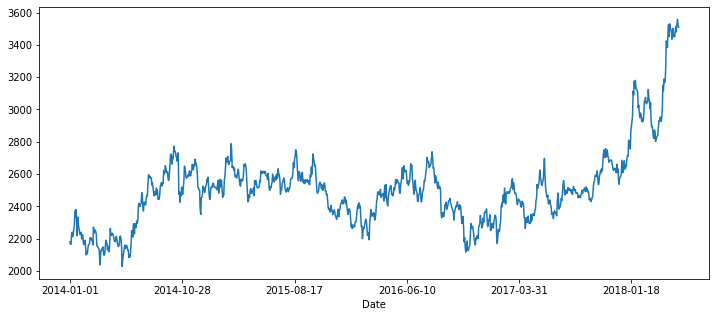

In [ ]:
df['Open'].plot(figsize=(12,5))

In [ ]:
#Get best p,d,q value for ARIMA model

from pmdarima import auto_arima 
#Ignore harmless warnings
import warnings
warnings.filterwarnings("always")


#The goal is to minimize the AIC and get the best order with the lowest AIC

stepwise_fit = auto_arima(df['Open'], trace=True, suppress_warnings=True)
stepwise_fit.summary()
stepwise_fit.order

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10899.753, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10901.750, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10901.751, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10898.954, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10903.754, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.656 seconds


(0, 1, 0)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
pred=[]
for i in range(60):
  train= df.iloc[:-(60-i)]
  model=ARIMA(train['Open'],order=stepwise_fit.order)
  model= model.fit()
  y=model.predict(start=len(train)+1,end=len(train)+1,typ='levels')
  pred.append(y)
predi=[]
for x in pred: predi.append(x.iloc[0])
real_stock_price= df.iloc[-60:]['Open'].values


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist

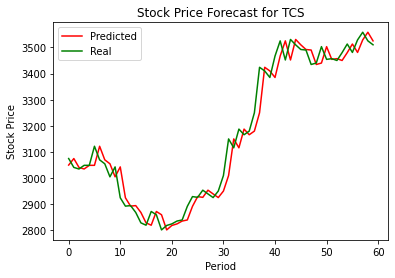

In [ ]:
plt.plot(predi, color="red", label= "Predicted")
plt.plot(real_stock_price, color="green", label= "Real")
plt.xlabel("Period")
plt.ylabel("Stock Price")
plt.title(f'Stock Price Forecast for {STOCK}')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

test=df.iloc[-60:]
import math 

from sklearn.metrics import mean_squared_error 
from math import sqrt 
 
MAE = mean_absolute_error(test['Open'], pred) #65.16489906613461
MSE = mean_squared_error(test['Open'], pred) #4877.095560904092
RMSE = math.sqrt(MSE) #69.83620522983828
R2 = r2_score(test['Open'], pred) #-3.0842872575999865
real_arima_stock_price_mean = test['Open'].mean()


print("Mean Absolute Error:", MAE)
print("Mean Squared Error:", MSE)
print("Root Mean Squared Error:", RMSE)
print("R Squared:", R2)
print("Real Stock Price Mean:", real_arima_stock_price_mean)
print("RMSE/REAL_STOCK_PRICE_MEAN:", RMSE/real_arima_stock_price_mean) #0.0938522023072058

Mean Absolute Error: 37.105
Mean Squared Error: 2492.2854166666666
Root Mean Squared Error: 49.9227945598668
R Squared: 0.9639201272704341
Real Stock Price Mean: 3170.437500000001
RMSE/REAL_STOCK_PRICE_MEAN: 0.01574634244007863
